<a href="https://colab.research.google.com/github/Sun0rise/study_project/blob/main/%D0%9A%D1%83%D1%80%D1%81%D0%BE%D0%B2%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%D0%BF%D0%BE%D0%B4%D0%B7%D0%B5%D0%BC%D0%BD%D0%B0%D1%8F_%D0%B3%D0%B8%D0%B4%D1%80%D0%BE%D0%BC%D0%B5%D1%85%D0%B0%D0%BD%D0%B8%D0%BA%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tabulate import tabulate
import math

import matplotlib as mpl

Исходные данные:

In [ ]:
F = 6240 * 10 ** 4 #м^2
b = 650            #м
l = 800            #м
h_0 = 20           #м
m = 0.22           #ед.
k = 0.350          #мкм^2
S_sv = 0.12        #ед.
S_ost = 0.80       #ед.
mu_o = 8           #мПа*с
mu_w = 1           #мПа*с
q = 210            #м^3/сут
eta_2 = 0.70       #ед.
T_0 = 4            #годы
N = 30             #ед.
r_ns = 0.1         #м
r_s = 0.01         #м

Определение коэффициента $А$ и параметра $S_{1}$

In [ ]:
A = ((1 - S_sv) / (S_ost - S_sv)) ** (-0.5)
S_1 = S_sv + (S_ost - S_sv) * A ** (2 / 3)
print('A = ', A)
print('S_1 = ', S_1)

A =  0.8790490729915326
S_1 =  0.7439996214609303


Построение зависимости относительных проницаемостей для нефти $k_н(S)$ и воды $k_в(S)$ от водонасыщенности

In [ ]:
def water_permeability(S, S_ost, S_sv, A):
    return np.piecewise(S, [S <= S_1, S > S_1],
                        [lambda S: ((S - S_sv) / (S_ost - S_sv)) ** 2,
                        lambda S: A * ((S - S_sv) / (S_ost - S_sv)) ** (0.5)])

def oil_permeability(S, S_ost):
    return np.piecewise(S, [S <= S_ost, S > S_ost],
                        [lambda S: ((S_ost - S) / (S_ost - S_sv)) ** 2, lambda S: 0])

delta_S = 0.0001
S = np.arange(S_sv, 1 + delta_S * 0.1, delta_S)
k_o = oil_permeability(S, S_ost)
k_w = water_permeability(S, S_ost, S_sv, A)

dk = {'S': S, 'k_w': k_w, 'k_o': k_o}
permeability = pd.DataFrame(dk)


Построение графика зависимости относительных проницаемостей для нефти  kн(S)  и воды  kв(S)  от водонасыщенности

(0.0, 1.0)

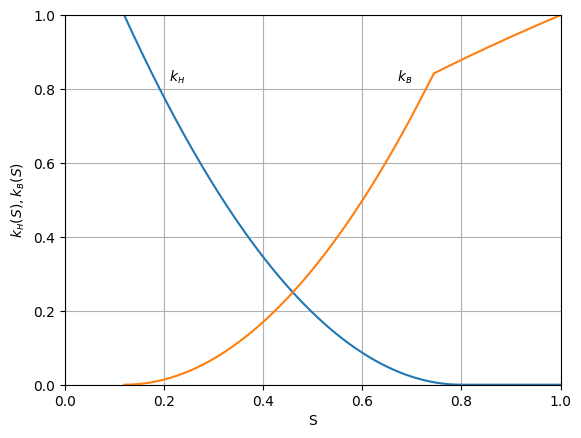

In [ ]:
fig, ax = plt.subplots(1, 1)  # Create a figure containing a single axes.
ax.plot(S, k_o, label='$k_н$')  # Plot some data on the axes.
ax.plot(S, k_w, label='$k_в$')
ax.grid()
ax.set_ylabel('$k_н(S), k_в(S)$')
ax.set_xlabel('S')
ax.text(0.21, 0.82, r'$k_н$')
ax.text(0.67, 0.82, r'$k_в$')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

Вычисление функции Бакли-Ливеретта

In [ ]:
def Buckley_Leverett_function(k_w, k_o, mu_w, mu_o):
    return k_w / (k_w + mu_w / mu_o * k_o)

f_bl = Buckley_Leverett_function(k_w, k_o, mu_w, mu_o)
f_bl

array([0.00000000e+00, 1.73061247e-07, 6.92448306e-07, ...,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00])

In [ ]:
dbl = {'S': S, 'f_bl': f_bl}
buc_lev_func = pd.DataFrame(dbl)
np.array(S_sv) + S[0:7801:500]

array([0.24, 0.29, 0.34, 0.39, 0.44, 0.49, 0.54, 0.59, 0.64, 0.69, 0.74,
       0.79, 0.84, 0.89, 0.94, 0.99])

Построение графика Бакли-Ливеретта

(0.0, 1.0)

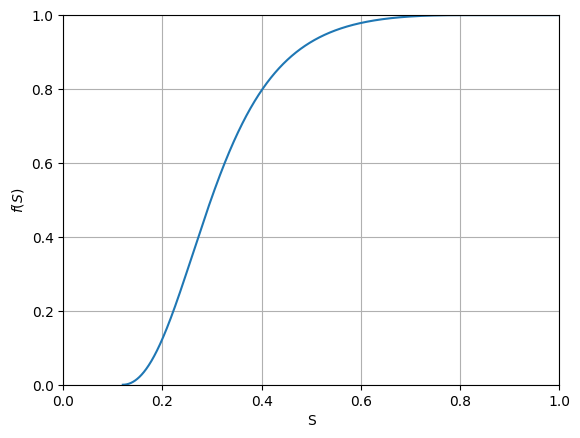

In [ ]:
fig, ax = plt.subplots(1, 1)  # Create a figure containing a single axes.
ax.plot(S, f_bl, label='$f(S)$')  # Plot some data on the axes.
ax.grid()
ax.set_ylabel('$f(S)$')
ax.set_xlabel('S')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

Поиск $S_ф$ с помощью построния касательной

In [ ]:
f_t = f_bl / (S - S_sv)
S_front = float(S[np.where(f_t == np.nanmax(f_t))])
f_bl_front = float(f_bl[np.where(f_t == np.nanmax(f_t))])
S_front, f_bl_front

<ipython-input-9-3f8dbd6b5b82>:1: RuntimeWarning: invalid value encountered in divide
  f_t = f_bl / (S - S_sv)
<ipython-input-9-3f8dbd6b5b82>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  S_front = float(S[np.where(f_t == np.nanmax(f_t))])
<ipython-input-9-3f8dbd6b5b82>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  f_bl_front = float(f_bl[np.where(f_t == np.nanmax(f_t))])


(0.3467000000000065, 0.6667646950692233)

Построения графика касательной

Text(0.3, 0.02, '$S_в$')

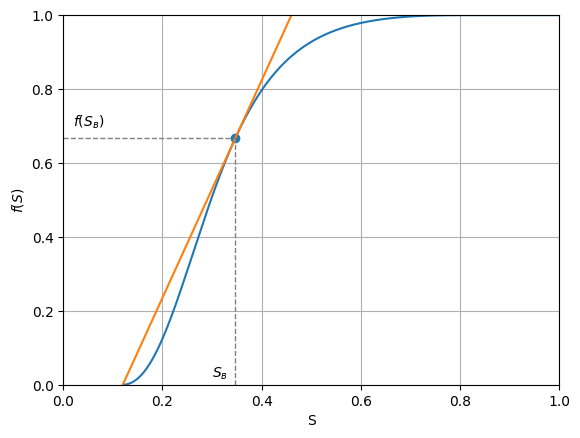

In [ ]:
fig, ax = plt.subplots(1, 1)  # Create a figure containing a single axes.
ax.plot(S, f_bl, label='$f(S)$')  # Plot some data on the axes.
ax.plot([S_sv, S_front, (S_front - S_sv) / f_bl_front + S_sv],
        [0, f_bl_front, 1])
ax.grid()
ax.set_ylabel('$f(S)$')
ax.set_xlabel('S')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.scatter(S_front, f_bl_front, marker='o')
ax.plot([0, S_front], [f_bl_front, f_bl_front], color='grey', linewidth=1, linestyle='--')
ax.plot([S_front, S_front], [0, f_bl_front], color='grey', linewidth=1, linestyle='--')
ax.text(0.02, 0.7, r'$f(S_в)$')
ax.text(0.3, 0.02, r'$S_в$')

Вычисление производной функции Бакли-Леверетта.

In [ ]:
def derivative_Buckley_Leverett_function(S, S_sv, S_ost, A, S_1, mu_o, mu_w):
    return np.where(S < S_1, (2 * (S - S_sv) / ((S - S_sv) ** 2 + mu_w / mu_o * (S_ost - S) ** 2) -
                    (S - S_sv) ** 2 * 2 * ((S - S_sv) - mu_w / mu_o * (S_ost - S)) /
                    ((S - S_sv) ** 2 + mu_w / mu_o * (S_ost - S) ** 2) ** 2),

                    A * (0.5 / (A * (S - S_sv) + mu_w / mu_o * (S_ost - S) ** 2 * (S - S_sv) ** 0.5) -
                    (A / 2 - 2 *  mu_w / mu_o * (S - S_sv) ** 0.5 * (S_ost - S)) /
                    (A * (S - S_sv) ** 0.5 + mu_w / mu_o * (S_ost - S) ** 2) ** 2))

f_der = derivative_Buckley_Leverett_function(S, S_sv, S_ost, A, S_1, mu_o, mu_w)
f_der_front = f_bl_front / (S_front - S_sv)

<ipython-input-11-08db1ac04c69>:6: RuntimeWarning: divide by zero encountered in divide
  A * (0.5 / (A * (S - S_sv) + mu_w / mu_o * (S_ost - S) ** 2 * (S - S_sv) ** 0.5) -


In [ ]:
dd = {'S': S, 'f_bl': f_der}
buc_lev_der_func = pd.DataFrame(dd)

Построение графика производной функции Бакли-Леверетта

Text(0.3, 0.2, '$S_в$')

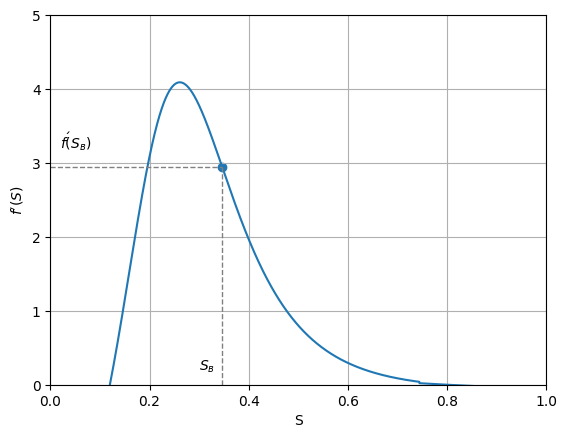

In [ ]:
fig, ax = plt.subplots(1, 1)  # Create a figure containing a single axes.
ax.plot(S, f_der, label='$f\'(S)$')  # Plot some data on the axes.
ax.grid()
ax.set_ylabel('$f \'(S)$')
ax.set_xlabel('S')
ax.set_xlim(0, 1)
ax.set_ylim(0, 5)
ax.scatter(S_front, f_der_front, marker='o')
ax.plot([0, S_front], [f_der_front, f_der_front], color='grey', linewidth=1, linestyle='--')
ax.plot([S_front, S_front], [0, f_der_front], color='grey', linewidth=1, linestyle='--')
ax.text(0.02, 3.2, r'$f\'(S_в)$')
ax.text(0.3, 0.2, r'$S_в$')

Вычисление производной функции Балки-Ливеретта численным методом

In [ ]:
f_numder = np.diff(f_bl) / delta_S
f_numder = np.insert(f_numder, 0, 0)

In [ ]:
f_der_s_f = f_der[np.where(S == S_front)]
f_numder_s_f = f_numder[np.where(S == S_front)]
f_der_s_f, f_der_front, f_numder_s_f

(array([2.94052768]), 2.9411764228901816, array([2.94150087]))

Построение графика численной производной функции Бакли_леверетта

Text(0.3, 0.2, '$S_ф$')

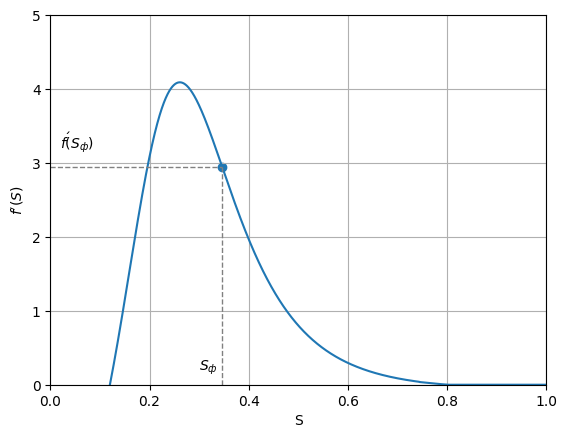

In [ ]:
fig, ax = plt.subplots(1, 1)  # Create a figure containing a single axes.
ax.plot(S, f_numder, label='$f\'(S)$')  # Plot some data on the axes.
ax.grid()
ax.set_ylabel('$f\'(S)$')
ax.set_xlabel('S')
ax.set_xlim(0, 1)
ax.set_ylim(0, 5)
ax.scatter(S_front, f_der_front, marker='o')
ax.plot([0, S_front], [f_der_front, f_der_front], color='grey', linewidth=1, linestyle='--')
ax.plot([S_front, S_front], [0, f_der_front], color='grey', linewidth=1, linestyle='--')
ax.text(0.02, 3.2, r'$f\'(S_ф)$')
ax.text(0.3, 0.2, r'$S_ф$')

Оперделение времени безводной эксплуатации

In [ ]:
f_der_front = f_bl_front / (S_front - S_sv)
t_dry = b * h_0 * eta_2 * m * l / (q * f_der_front) #сутки
t_dry_years = round(t_dry / 364.25, 3)
t_dry, t_dry_years

(2593.066708719307, 7.119)

Вычисление показателей разработки элемента

In [ ]:
T = np.array([i / 4 for i in range(0, round(t_dry_years) * 4 + 1)] + [t_dry_years] +
             [i / 4 for i in range(round(t_dry_years) * 4 + 1, 401)])
T

array([  0.   ,   0.25 ,   0.5  ,   0.75 ,   1.   ,   1.25 ,   1.5  ,
         1.75 ,   2.   ,   2.25 ,   2.5  ,   2.75 ,   3.   ,   3.25 ,
         3.5  ,   3.75 ,   4.   ,   4.25 ,   4.5  ,   4.75 ,   5.   ,
         5.25 ,   5.5  ,   5.75 ,   6.   ,   6.25 ,   6.5  ,   6.75 ,
         7.   ,   7.119,   7.25 ,   7.5  ,   7.75 ,   8.   ,   8.25 ,
         8.5  ,   8.75 ,   9.   ,   9.25 ,   9.5  ,   9.75 ,  10.   ,
        10.25 ,  10.5  ,  10.75 ,  11.   ,  11.25 ,  11.5  ,  11.75 ,
        12.   ,  12.25 ,  12.5  ,  12.75 ,  13.   ,  13.25 ,  13.5  ,
        13.75 ,  14.   ,  14.25 ,  14.5  ,  14.75 ,  15.   ,  15.25 ,
        15.5  ,  15.75 ,  16.   ,  16.25 ,  16.5  ,  16.75 ,  17.   ,
        17.25 ,  17.5  ,  17.75 ,  18.   ,  18.25 ,  18.5  ,  18.75 ,
        19.   ,  19.25 ,  19.5  ,  19.75 ,  20.   ,  20.25 ,  20.5  ,
        20.75 ,  21.   ,  21.25 ,  21.5  ,  21.75 ,  22.   ,  22.25 ,
        22.5  ,  22.75 ,  23.   ,  23.25 ,  23.5  ,  23.75 ,  24.   ,
        24.25 ,  24.

Создаем таблицу показателей элементов разработки




In [ ]:
zero = np.array([0 for i in range(0, np.size(T))])
d = {'t, годы': T, 'f\'(S)': zero, 'S': zero, 'v_э': zero,
     'q_нэ, м3/сут': zero, 'q_вэ, м3/сут': zero,
     'delta Q_нэ, тыс.м3': zero, 'Q_нэ, тыс.м3': zero,
     'eta_э': zero, 'delta Q_вэ, тыс.м3': zero,
     'Q_вэ, тыс.м3': zero}
elem_dev = pd.DataFrame(data=d)
elem_dev

,"t, годы",f'(S),S,v_э,"q_нэ, м3/сут","q_вэ, м3/сут","delta Q_нэ, тыс.м3","Q_нэ, тыс.м3",eta_э,"delta Q_вэ, тыс.м3","Q_вэ, тыс.м3"
0,0.00,0,0,0,0,0,0,0,0,0,0
1,0.25,0,0,0,0,0,0,0,0,0,0
2,0.50,0,0,0,0,0,0,0,0,0,0
3,0.75,0,0,0,0,0,0,0,0,0,0
4,1.00,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
397,99.00,0,0,0,0,0,0,0,0,0,0
398,99.25,0,0,0,0,0,0,0,0,0,0
399,99.50,0,0,0,0,0,0,0,0,0,0
400,99.75,0,0,0,0,0,0,0,0,0,0


Формулы для нахождения показателей элемента:

1.   $f'(\bar{S})=\frac{f'(\bar{S_{ф}})⋅t^*}{t}$ при $t>t^*$
2.   $\nu_э=f(\bar{S})$
3. $q_{нэ} = q ⋅(1 - \nu_э)$
4. $q_{вэ} = q ⋅\nu_э$
5. $\Delta Q_{нэ} = q_{нэ} \cdot 365$ в безводный период
  $\Delta Q_{нэi} = \frac{q_{нэi} + q_{нэ(i+1)}}{2} \cdot 365$
6. $Q_{нэi} = \sum \limits_{k = 0}^{i} \Delta Q_{нэk}$
7. $\eta_э=\frac{Q_{нэ}}{m\cdot h\cdot h_0\cdot l\cdot (1-S_{св})}$


In [ ]:
elem_dev['f\'(S)'] = np.where(T < t_dry_years, 0, np.round(f_der_front * t_dry_years / T, 4))
elem_dev.iloc[25:35]

<ipython-input-20-3963b5a87b0c>:1: RuntimeWarning: divide by zero encountered in divide
  elem_dev['f\'(S)'] = np.where(T < t_dry_years, 0, np.round(f_der_front * t_dry_years / T, 4))


,"t, годы",f'(S),S,v_э,"q_нэ, м3/сут","q_вэ, м3/сут","delta Q_нэ, тыс.м3","Q_нэ, тыс.м3",eta_э,"delta Q_вэ, тыс.м3","Q_вэ, тыс.м3"
25,6.250,0.0000,0,0,0,0,0,0,0,0,0
26,6.500,0.0000,0,0,0,0,0,0,0,0,0
27,6.750,0.0000,0,0,0,0,0,0,0,0,0
28,7.000,0.0000,0,0,0,0,0,0,0,0,0
29,7.119,2.9412,0,0,0,0,0,0,0,0,0
30,7.250,2.8880,0,0,0,0,0,0,0,0,0
31,7.500,2.7918,0,0,0,0,0,0,0,0,0
32,7.750,2.7017,0,0,0,0,0,0,0,0,0
33,8.000,2.6173,0,0,0,0,0,0,0,0,0
34,8.250,2.5380,0,0,0,0,0,0,0,0,0


In [ ]:
for i in range(0, np.size(elem_dev['f\'(S)'])):
    if elem_dev['f\'(S)'][i] == 0:
        elem_dev['S'][i] = S_sv
    else:
        left, right = int(np.where(S == S_front)[0]), int(np.size(S))
     #   for k in range(right, l - 1):
    #        if (f_bl[k] < elem_dev['f\'(S)'][i] and f_bl[k + 1] > elem_dev['f\'(S)'][i]):
        while (right - left > 1):
            mid = (right + left) // 2
            if f_der[mid] < elem_dev['f\'(S)'][i]:
                right = mid
            else:
                left = mid
        elem_dev['S'][i] = S[left]
elem_dev.iloc[0:35]

<ipython-input-21-b3d651b8a34f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elem_dev['S'][i] = S_sv
<ipython-input-21-b3d651b8a34f>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  left, right = int(np.where(S == S_front)[0]), int(np.size(S))


,"t, годы",f'(S),S,v_э,"q_нэ, м3/сут","q_вэ, м3/сут","delta Q_нэ, тыс.м3","Q_нэ, тыс.м3",eta_э,"delta Q_вэ, тыс.м3","Q_вэ, тыс.м3"
0,0.000,0.0000,0.1200,0,0,0,0,0,0,0,0
1,0.250,0.0000,0.1200,0,0,0,0,0,0,0,0
2,0.500,0.0000,0.1200,0,0,0,0,0,0,0,0
3,0.750,0.0000,0.1200,0,0,0,0,0,0,0,0
4,1.000,0.0000,0.1200,0,0,0,0,0,0,0,0
5,1.250,0.0000,0.1200,0,0,0,0,0,0,0,0
6,1.500,0.0000,0.1200,0,0,0,0,0,0,0,0
7,1.750,0.0000,0.1200,0,0,0,0,0,0,0,0
8,2.000,0.0000,0.1200,0,0,0,0,0,0,0,0
9,2.250,0.0000,0.1200,0,0,0,0,0,0,0,0


In [ ]:
for i in range(0, np.size(elem_dev['S'])):
      left, right = 0, int(np.size(S))
     #   for k in range(r, l - 1):
    #        if (f_bl[k] < elem_dev['f\'(S)'][i] and f_bl[k + 1] > elem_dev['f\'(S)'][i]):
      while (right - left > 1):
          mid = (right + left) // 2
          if S[mid] > elem_dev['S'][i]:
              right = mid
          else:
              left = mid
      elem_dev['v_э'][i] = f_bl[left]
elem_dev.iloc[:35]

<ipython-input-22-5ad1e5e3a404>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elem_dev['v_э'][i] = f_bl[left]
<ipython-input-22-5ad1e5e3a404>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elem_dev['v_э'][i] = f_bl[left]
<ipython-input-22-5ad1e5e3a404>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elem_dev['v_э'][i] = f_bl[left]
<ipython-input-22-5ad1e5e3a404>:11: SettingWithCopyWarning: 
A value is trying to be set on a cop

,"t, годы",f'(S),S,v_э,"q_нэ, м3/сут","q_вэ, м3/сут","delta Q_нэ, тыс.м3","Q_нэ, тыс.м3",eta_э,"delta Q_вэ, тыс.м3","Q_вэ, тыс.м3"
0,0.000,0.0000,0.1200,0.000000,0,0,0,0,0,0,0
1,0.250,0.0000,0.1200,0.000000,0,0,0,0,0,0,0
2,0.500,0.0000,0.1200,0.000000,0,0,0,0,0,0,0
3,0.750,0.0000,0.1200,0.000000,0,0,0,0,0,0,0
4,1.000,0.0000,0.1200,0.000000,0,0,0,0,0,0,0
5,1.250,0.0000,0.1200,0.000000,0,0,0,0,0,0,0
6,1.500,0.0000,0.1200,0.000000,0,0,0,0,0,0,0
7,1.750,0.0000,0.1200,0.000000,0,0,0,0,0,0,0
8,2.000,0.0000,0.1200,0.000000,0,0,0,0,0,0,0
9,2.250,0.0000,0.1200,0.000000,0,0,0,0,0,0,0


In [ ]:
elem_dev.to_excel("outpet.xlsx")

In [ ]:
elem_dev['q_нэ, м3/сут'] = q * (1 - elem_dev['v_э'])
elem_dev['q_нэ, м3/сут'][0] = 0
elem_dev['q_вэ, м3/сут'] = q * elem_dev['v_э']
eta_0 = eta_2 / (f_der_front * (1 - S_sv))
elem_dev.iloc[25:35], eta_0

<ipython-input-433-0d9340735203>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elem_dev['q_нэ, м3/сут'][0] = 0


(    t, годы   f'(S)       S       v_э  q_нэ, м3/сут  q_вэ, м3/сут  \
 25    6.250  0.0000  0.1200  0.000000    210.000000      0.000000   
 26    6.500  0.0000  0.1200  0.000000    210.000000      0.000000   
 27    6.750  0.0000  0.1200  0.000000    210.000000      0.000000   
 28    7.000  0.0000  0.1200  0.000000    210.000000      0.000000   
 29    7.119  2.9412  0.3467  0.666765     69.979414    140.020586   
 30    7.250  2.8880  0.3493  0.674344     68.387700    141.612300   
 31    7.500  2.7918  0.3543  0.688551     65.404277    144.595723   
 32    7.750  2.7017  0.3590  0.701464     62.692567    147.307433   
 33    8.000  2.6173  0.3634  0.713168     60.234777    149.765223   
 34    8.250  2.5380  0.3676  0.723996     57.960926    152.039074   
 
     delta Q_нэ, тыс.м3  Q_нэ, тыс.м3  eta_э  delta Q_вэ, тыс.м3  Q_вэ, тыс.м3  
 25                   0             0      0                   0             0  
 26                   0             0      0                   0  

In [ ]:
elem_dev['delta Q_нэ, тыс.м3'][0] = 0
for i in range(1, np.size(elem_dev['q_нэ, м3/сут'])):
      elem_dev['delta Q_нэ, тыс.м3'][i] = (((elem_dev['q_нэ, м3/сут'][i - 1] +
                                           elem_dev['q_нэ, м3/сут'][i]) /
                                           2) * (elem_dev['t, годы'][i] -
                                                 elem_dev['t, годы'][i - 1])
                                           * 365 / 1000)
      elem_dev['delta Q_вэ, тыс.м3'][i] = (((elem_dev['q_вэ, м3/сут'][i - 1] +
                                           elem_dev['q_вэ, м3/сут'][i]) /
                                           2) * (elem_dev['t, годы'][i] -
                                                 elem_dev['t, годы'][i - 1])
                                           * 365 / 1000)
elem_dev.iloc[0:45]

<ipython-input-434-626277098031>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elem_dev['delta Q_нэ, тыс.м3'][0] = 0
<ipython-input-434-626277098031>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elem_dev['delta Q_нэ, тыс.м3'][i] = (((elem_dev['q_нэ, м3/сут'][i - 1] +
<ipython-input-434-626277098031>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elem_dev['delta Q_вэ, тыс.м3'][i] = (((elem_dev['q_вэ, м3/сут'][i - 1] +


,"t, годы",f'(S),S,v_э,"q_нэ, м3/сут","q_вэ, м3/сут","delta Q_нэ, тыс.м3","Q_нэ, тыс.м3",eta_э,"delta Q_вэ, тыс.м3","Q_вэ, тыс.м3"
0,0.000,0.0000,0.1200,0.000000,0.000000,0.000000,0.000000,0,0,0.000000,0
1,0.250,0.0000,0.1200,0.000000,210.000000,0.000000,9.581250,0,0,0.000000,0
2,0.500,0.0000,0.1200,0.000000,210.000000,0.000000,19.162500,0,0,0.000000,0
3,0.750,0.0000,0.1200,0.000000,210.000000,0.000000,19.162500,0,0,0.000000,0
4,1.000,0.0000,0.1200,0.000000,210.000000,0.000000,19.162500,0,0,0.000000,0
5,1.250,0.0000,0.1200,0.000000,210.000000,0.000000,19.162500,0,0,0.000000,0
6,1.500,0.0000,0.1200,0.000000,210.000000,0.000000,19.162500,0,0,0.000000,0
7,1.750,0.0000,0.1200,0.000000,210.000000,0.000000,19.162500,0,0,0.000000,0
8,2.000,0.0000,0.1200,0.000000,210.000000,0.000000,19.162500,0,0,0.000000,0
9,2.250,0.0000,0.1200,0.000000,210.000000,0.000000,19.162500,0,0,0.000000,0


In [ ]:
elem_dev['Q_нэ, тыс.м3'] = np.cumsum(elem_dev['delta Q_нэ, тыс.м3'])
elem_dev['Q_вэ, тыс.м3'] = np.cumsum(elem_dev['delta Q_вэ, тыс.м3'])

In [ ]:
elem_dev['eta_э'] = elem_dev['Q_нэ, тыс.м3'] * 1000 / (m * b * h_0 * l * (1 - S_sv))
elem_dev.iloc[:35]

,"t, годы",f'(S),S,v_э,"q_нэ, м3/сут","q_вэ, м3/сут","delta Q_нэ, тыс.м3","Q_нэ, тыс.м3",eta_э,"delta Q_вэ, тыс.м3","Q_вэ, тыс.м3"
0,0.000,0.0000,0.1200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.250,0.0000,0.1200,0.000000,210.000000,0.000000,9.581250,9.581250,0.004759,0.000000,0.000000
2,0.500,0.0000,0.1200,0.000000,210.000000,0.000000,19.162500,28.743750,0.014276,0.000000,0.000000
3,0.750,0.0000,0.1200,0.000000,210.000000,0.000000,19.162500,47.906250,0.023793,0.000000,0.000000
4,1.000,0.0000,0.1200,0.000000,210.000000,0.000000,19.162500,67.068750,0.033311,0.000000,0.000000
5,1.250,0.0000,0.1200,0.000000,210.000000,0.000000,19.162500,86.231250,0.042828,0.000000,0.000000
6,1.500,0.0000,0.1200,0.000000,210.000000,0.000000,19.162500,105.393750,0.052345,0.000000,0.000000
7,1.750,0.0000,0.1200,0.000000,210.000000,0.000000,19.162500,124.556250,0.061862,0.000000,0.000000
8,2.000,0.0000,0.1200,0.000000,210.000000,0.000000,19.162500,143.718750,0.071380,0.000000,0.000000
9,2.250,0.0000,0.1200,0.000000,210.000000,0.000000,19.162500,162.881250,0.080897,0.000000,0.000000


График показателей разработки элемента

Text(20, 0.4, '$\\eta_э$')

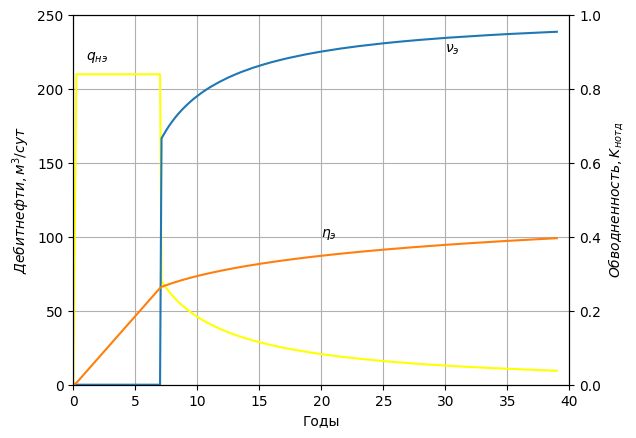

In [ ]:
fig, ax1 = plt.subplots(1, 1)
ax1.plot(T[:158], elem_dev['q_нэ, м3/сут'][:158], color='yellow')
ax2 = plt.twinx(ax1)
ax2.plot(T[:158], elem_dev['v_э'][:158])
ax2.plot(T[:158], elem_dev['eta_э'][:158])
ax1.grid()
ax1.set_ylabel('$Дебит нефти, м^3/сут$')
ax1.set_xlabel('Годы')
ax2.set_ylabel('$Обводненность, K_{нотд}$')
ax1.set_xlim(0, 40)
ax1.set_ylim(0, 250)
ax2.set_ylim(0, 1)
ax1.text(1, 220, r'$q_{нэ}$')
ax2.text(30, 0.9, r'$\nu_э$')
ax2.text(20, 0.4, r'$\eta_э$')

Посчитаем динамику добычи всего месторождения

In [ ]:
elem_dev_years = elem_dev.drop(29).iloc[::4]
T_years = np.delete(T, 29)[::4]
zero1 = np.array([0 for i in range(0, np.size(T_years))])
elem_dev_years.iloc[:40]

,"t, годы",f'(S),S,v_э,"q_нэ, м3/сут","q_вэ, м3/сут","delta Q_нэ, тыс.м3","Q_нэ, тыс.м3",eta_э,"delta Q_вэ, тыс.м3","Q_вэ, тыс.м3"
0,0.0,0.0000,0.1200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,1.0,0.0000,0.1200,0.000000,210.000000,0.000000,19.162500,67.068750,0.033311,0.000000,0.000000
8,2.0,0.0000,0.1200,0.000000,210.000000,0.000000,19.162500,143.718750,0.071380,0.000000,0.000000
12,3.0,0.0000,0.1200,0.000000,210.000000,0.000000,19.162500,220.368750,0.109449,0.000000,0.000000
16,4.0,0.0000,0.1200,0.000000,210.000000,0.000000,19.162500,297.018750,0.147518,0.000000,0.000000
20,5.0,0.0000,0.1200,0.000000,210.000000,0.000000,19.162500,373.668750,0.185587,0.000000,0.000000
24,6.0,0.0000,0.1200,0.000000,210.000000,0.000000,19.162500,450.318750,0.223656,0.000000,0.000000
28,7.0,0.0000,0.1200,0.000000,210.000000,0.000000,19.162500,526.968750,0.261726,0.000000,0.000000
33,8.0,2.6173,0.3634,0.713168,60.234777,149.765223,5.608560,553.914452,0.275108,13.553940,49.704298
37,9.0,2.3265,0.3790,0.751725,52.137811,157.862189,4.838995,574.348044,0.285257,14.323505,105.920706


Динамика добычи нефти

In [ ]:

d_d_o = {'T': T_years, 'N1': zero1, 'N2': zero1, 'N3': zero1, 'N4': zero1,
       'q_н': zero1, 'Q_н': zero1, 'Q_нэ, тыс.м3': zero1}
dynamic_dev_oil = pd.DataFrame(d_d_o)

for i in range(0, 7):
    dynamic_dev_oil['Q_нэ, тыс.м3'][i] = elem_dev['Q_нэ, тыс.м3'][i * 4]
for i in range(7, 100):
    dynamic_dev_oil['Q_нэ, тыс.м3'][i] = elem_dev['Q_нэ, тыс.м3'][i * 4 + 1]

dynamic_dev_oil.iloc[30:40]

<ipython-input-439-ff96234f869e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dynamic_dev_oil['Q_нэ, тыс.м3'][i] = elem_dev['Q_нэ, тыс.м3'][i * 4]


,T,N1,N2,N3,N4,q_н,Q_н,"Q_нэ, тыс.м3"
30,30.0,0,0,0,0,0,0,761.945014
31,31.0,0,0,0,0,0,0,766.579522
32,32.0,0,0,0,0,0,0,771.039809
33,33.0,0,0,0,0,0,0,775.338865
34,34.0,0,0,0,0,0,0,779.485215
35,35.0,0,0,0,0,0,0,783.489842
36,36.0,0,0,0,0,0,0,787.359101
37,37.0,0,0,0,0,0,0,791.102883
38,38.0,0,0,0,0,0,0,794.726733
39,39.0,0,0,0,0,0,0,798.237524


In [ ]:
dynamic_dev_oil['N1'] = np.where(dynamic_dev_oil['T'] < 1, 0,
                                 elem_dev_years['q_нэ, м3/сут'] * N / 1000)
dynamic_dev_oil['N2'][1:] = dynamic_dev_oil['N1'][:-1]
dynamic_dev_oil['N3'][2:] = dynamic_dev_oil['N1'][:-2]
dynamic_dev_oil['N4'][3:] = dynamic_dev_oil['N1'][:-3]
dynamic_dev_oil.iloc[:35]

<ipython-input-440-d97e7207796e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dynamic_dev_oil['N2'][1:] = dynamic_dev_oil['N1'][:-1]
<ipython-input-440-d97e7207796e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dynamic_dev_oil['N3'][2:] = dynamic_dev_oil['N1'][:-2]
<ipython-input-440-d97e7207796e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dynamic_dev_oil['N4'][3:] = dynamic_dev_oil['N1'][:-3]


,T,N1,N2,N3,N4,q_н,Q_н,"Q_нэ, тыс.м3"
0,0.0,0.000000,0.000000,0.000000,0.000000,0,0,0.000000
1,1.0,6.300000,0.000000,0.000000,0.000000,0,0,67.068750
2,2.0,6.300000,6.300000,0.000000,0.000000,0,0,143.718750
3,3.0,6.300000,6.300000,6.300000,0.000000,0,0,220.368750
4,4.0,6.300000,6.300000,6.300000,6.300000,0,0,297.018750
5,5.0,6.300000,6.300000,6.300000,6.300000,0,0,373.668750
6,6.0,6.300000,6.300000,6.300000,6.300000,0,0,450.318750
7,7.0,6.300000,6.300000,6.300000,6.300000,0,0,533.049203
8,8.0,1.807043,6.300000,6.300000,6.300000,0,0,553.914452
9,9.0,1.564134,1.807043,6.300000,6.300000,0,0,574.348044


In [ ]:
dynamic_dev_oil['q_н'] = (dynamic_dev_oil['N1'] + dynamic_dev_oil['N2'] +
                          dynamic_dev_oil['N3'] + dynamic_dev_oil['N4'])
dynamic_dev_oil.iloc[:35]

,T,N1,N2,N3,N4,q_н,Q_н,"Q_нэ, тыс.м3"
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000
1,1.0,6.300000,0.000000,0.000000,0.000000,6.300000,0,67.068750
2,2.0,6.300000,6.300000,0.000000,0.000000,12.600000,0,143.718750
3,3.0,6.300000,6.300000,6.300000,0.000000,18.900000,0,220.368750
4,4.0,6.300000,6.300000,6.300000,6.300000,25.200000,0,297.018750
5,5.0,6.300000,6.300000,6.300000,6.300000,25.200000,0,373.668750
6,6.0,6.300000,6.300000,6.300000,6.300000,25.200000,0,450.318750
7,7.0,6.300000,6.300000,6.300000,6.300000,25.200000,0,533.049203
8,8.0,1.807043,6.300000,6.300000,6.300000,20.707043,0,553.914452
9,9.0,1.564134,1.807043,6.300000,6.300000,15.971178,0,574.348044


In [ ]:
np.size(dynamic_dev_oil['T']), np.size(elem_dev_years['Q_нэ, тыс.м3']), elem_dev_years['Q_нэ, тыс.м3'],
dynamic_dev_oil['Q_н'] = np.where(dynamic_dev_oil['T'] < 4, dynamic_dev_oil['T'] * N * dynamic_dev_oil['Q_нэ, тыс.м3'] / 1000,
                                  4 * N * dynamic_dev_oil['Q_нэ, тыс.м3'] / 1000)
dynamic_dev_oil.iloc[:35]

,T,N1,N2,N3,N4,q_н,Q_н,"Q_нэ, тыс.м3"
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.0,6.300000,0.000000,0.000000,0.000000,6.300000,2.012062,67.068750
2,2.0,6.300000,6.300000,0.000000,0.000000,12.600000,8.623125,143.718750
3,3.0,6.300000,6.300000,6.300000,0.000000,18.900000,19.833187,220.368750
4,4.0,6.300000,6.300000,6.300000,6.300000,25.200000,35.642250,297.018750
5,5.0,6.300000,6.300000,6.300000,6.300000,25.200000,44.840250,373.668750
6,6.0,6.300000,6.300000,6.300000,6.300000,25.200000,54.038250,450.318750
7,7.0,6.300000,6.300000,6.300000,6.300000,25.200000,63.965904,533.049203
8,8.0,1.807043,6.300000,6.300000,6.300000,20.707043,66.469734,553.914452
9,9.0,1.564134,1.807043,6.300000,6.300000,15.971178,68.921765,574.348044


Динамика добычи воды

In [ ]:
d_d_w = {'T': T_years, 'N1': zero1, 'N2': zero1, 'N3': zero1, 'N4': zero1,
       'q_в': zero1, 'Q_в': zero1, 'Q_вэ, тыс.м3': zero1}
dynamic_dev_water = pd.DataFrame(d_d_w)

for i in range(1, 8):
    dynamic_dev_water['Q_вэ, тыс.м3'][i] = elem_dev_years['delta Q_вэ, тыс.м3'][i * 4]
for i in range(8, 100):
    dynamic_dev_water['Q_вэ, тыс.м3'][i] = elem_dev_years['delta Q_вэ, тыс.м3'][i * 4 + 1]

dynamic_dev_water.iloc[:35]

<ipython-input-443-92e1acb3001c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dynamic_dev_water['Q_вэ, тыс.м3'][i] = elem_dev_years['delta Q_вэ, тыс.м3'][i * 4]
<ipython-input-443-92e1acb3001c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dynamic_dev_water['Q_вэ, тыс.м3'][i] = elem_dev_years['delta Q_вэ, тыс.м3'][i * 4 + 1]


,T,N1,N2,N3,N4,q_в,Q_в,"Q_вэ, тыс.м3"
0,0.0,0,0,0,0,0,0,0.000000
1,1.0,0,0,0,0,0,0,0.000000
2,2.0,0,0,0,0,0,0,0.000000
3,3.0,0,0,0,0,0,0,0.000000
4,4.0,0,0,0,0,0,0,0.000000
5,5.0,0,0,0,0,0,0,0.000000
6,6.0,0,0,0,0,0,0,0.000000
7,7.0,0,0,0,0,0,0,0.000000
8,8.0,0,0,0,0,0,0,13.553940
9,9.0,0,0,0,0,0,0,14.323505


In [ ]:
dynamic_dev_water['N1'] = np.where(dynamic_dev_water['T'] < 8, 0,
                                 elem_dev_years['q_вэ, м3/сут'] * N / 1000)
dynamic_dev_water['N2'][8:] = dynamic_dev_water['N1'][7:-1]
dynamic_dev_water['N3'][9:] = dynamic_dev_water['N1'][7:-2]
dynamic_dev_water['N4'][10:] = dynamic_dev_water['N1'][7:-3]

<ipython-input-444-b1f9ff2ecb70>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dynamic_dev_water['N2'][8:] = dynamic_dev_water['N1'][7:-1]
<ipython-input-444-b1f9ff2ecb70>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dynamic_dev_water['N3'][9:] = dynamic_dev_water['N1'][7:-2]
<ipython-input-444-b1f9ff2ecb70>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dynamic_dev_water['N4'][10:] = dynamic_dev_water['N1'][7:-3]


In [ ]:
dynamic_dev_water['q_в'] = (dynamic_dev_water['N1'] + dynamic_dev_water['N2'] +
                          dynamic_dev_water['N3'] + dynamic_dev_water['N4']) / 1000

In [ ]:
dynamic_dev_water['Q_в'] = np.where(dynamic_dev_water['T'] < 4, dynamic_dev_water['T'] * N * dynamic_dev_water['Q_вэ, тыс.м3'] / 1000,
                                  4 * 30 * elem_dev_years['Q_вэ, тыс.м3'] / 1000)
dynamic_dev_water.iloc[0:35]

,T,N1,N2,N3,N4,q_в,Q_в,"Q_вэ, тыс.м3"
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,3.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,4.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,5.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,6.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,7.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,8.0,4.492957,0.000000,0.000000,0.000000,0.004493,5.964516,13.553940
9,9.0,4.735866,4.492957,0.000000,0.000000,0.009229,12.710485,14.323505


Динамика обводненности и коэффициента текущей нефтеотдачи

In [ ]:
d_k = {'T': T_years, 'Обводненность': zero1, 'Коэф.тек.нефтеотдачи': zero1}
dynamic = pd.DataFrame(d_k)

In [ ]:
dynamic['Обводненность'] = (dynamic_dev_water['q_в'] /
                            (dynamic_dev_water['q_в'] + dynamic_dev_oil['q_н']))
dynamic.iloc[:35]

,T,Обводненность,Коэф.тек.нефтеотдачи
0,0.0,NaN,0
1,1.0,0.000000,0
2,2.0,0.000000,0
3,3.0,0.000000,0
4,4.0,0.000000,0
5,5.0,0.000000,0
6,6.0,0.000000,0
7,7.0,0.000000,0
8,8.0,0.000217,0
9,9.0,0.000578,0


In [ ]:
V_0 = F *h_0 * m * (1 - S_sv)

dynamic['Коэф.тек.нефтеотдачи'] = dynamic_dev_oil['Q_н'] * 10 ** 6 / V_0
dynamic.iloc[:35]

,T,Обводненность,Коэф.тек.нефтеотдачи
0,0.0,NaN,0.000000
1,1.0,0.000000,0.008328
2,2.0,0.000000,0.035690
3,3.0,0.000000,0.082087
4,4.0,0.000000,0.147518
5,5.0,0.000000,0.185587
6,6.0,0.000000,0.223656
7,7.0,0.000000,0.264746
8,8.0,0.000217,0.275108
9,9.0,0.000578,0.285257


График показателей разработки месторождения

Text(30, 0.5, '$\\eta$')

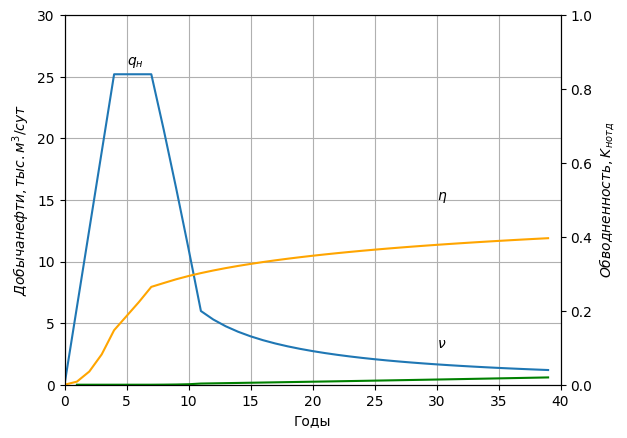

In [ ]:
fig, ax1 = plt.subplots(1, 1)
ax1.plot(T_years[:40], dynamic_dev_oil['q_н'][:40])
ax2 = plt.twinx(ax1)
ax2.plot(T_years[:40], dynamic['Обводненность'][:40], color='green')
ax2.plot(T_years[:40], dynamic['Коэф.тек.нефтеотдачи'][:40], color='orange')
ax1.grid()
ax1.set_ylabel('$Добыча нефти, тыс.м^3/сут$')
ax1.set_xlabel('Годы')
ax2.set_ylabel('$Обводненность, K_{нотд}$')
ax1.set_xlim(0, 40)
ax1.set_ylim(0, 30)
ax2.set_ylim(0, 1)
ax1.text(5, 26, r'$q_{н}$')
ax2.text(30, 0.1, r'$\nu$')
ax2.text(30, 0.5, r'$\eta$')

Расчет перепада давления в элементе системы разработки на основе поршневого вытеснения нефти водой

а) $x_в=r_{нс}$

Формула перепада давления

$P_н - P_с = \frac{2q}{2kh}\cdot (\frac{\mu_в \cdot ln\frac{\sigma}{\pi\cdot r_{нс}}}{\pi\cdot k_в(S^*)} + \frac{l\mu_н}{bk_и(S_{св})}+\frac{\mu_н \cdot ln\frac{\sigma}{\pi\cdot r_{с}}}{\pi\cdot k_н(S_{св})})$

In [ ]:
sigma = b / 2

In [ ]:
delta_P_1 = (q / (k * 10 ** (-12) * h_0 * eta_2 * 86400)
              * (mu_w * 10 ** (-3) * math.log(sigma / (math.pi * r_ns)) / (math.pi * A) +
                 l * mu_o * 10 ** (-3) / (b * 1) +
                 mu_o * 10 ** (-3) * math.log(sigma / (math.pi * r_s)) / (math.pi * 1))) * 10 ** (-6)

delta_P_1, 'МПа'

(17.807596308080335, 'МПа')

б) $x_в=\frac{l}{2}$

Формула перепада давления

$P_н - P_с = \frac{2q}{2kh}\cdot (\frac{\mu_в \cdot ln\frac{\sigma}{\pi\cdot r_{нс}}}{\pi\cdot k_в(S^*)} + \frac{\mu_в\cdot\frac{l}{2}}{b\frac{\bar{k}_в}{\bar{f}(S)}}+\frac{\mu_н\cdot(l-\frac{l}{2})}{bk_и(S_{св})}+\frac{\mu_н \cdot ln\frac{\sigma}{\pi\cdot r_{с}}}{\pi\cdot k_н(S_{св})})$

In [ ]:
k_f = float((k_w[np.where(S == S_front)] / f_bl_front +
       A / (A / (A + mu_w / mu_o * 1))) / 2)
k_f

0.5853701260827064

In [ ]:
delta_P_2 = (q / (k * 10 ** (-12) * h_0 * eta_2 * 86400)
              * (mu_w * 10 ** (-3) * math.log(sigma / (math.pi * r_ns)) / (math.pi * A) +
                 l / 2 * mu_w * 10 ** (-3) / (b * k_f) +
                 (l - l / 2) * mu_o * 10 ** (-3) / (b * 1) +
                 mu_o * 10 ** (-3) * math.log(sigma / (math.pi * r_s)) / (math.pi * 1))) * 10 ** (-6)

delta_P_2, 'МПа'

(15.88705933151433, 'МПа')

в) $x_в=l$

Формула перепада давления

$P_н - P_с = \frac{2q}{2kh}\cdot (\frac{\mu_в \cdot ln\frac{\sigma}{\pi\cdot r_{нс}}}{\pi\cdot k_в(S^*)} + \frac{l\mu_в}{b\frac{\bar{k}_в}{\bar{f}(S)}}+\frac{\mu_н \cdot ln\frac{\sigma}{\pi\cdot r_{с}}}{\pi\cdot k_н(S_{св})})$

In [ ]:
delta_P_3 = (q / (k * 10 ** (-12) * h_0 * eta_2 * 86400)
              * (mu_w * 10 ** (-3) * math.log(sigma / (math.pi * r_ns)) / (math.pi * A) +
                 l  * mu_w * 10 ** (-3) / (b * k_f) +
                 mu_o * 10 ** (-3) * math.log(sigma / (math.pi * r_s)) / (math.pi * 1))) * 10 ** (-6)

delta_P_3, 'МПа'

(13.966522354948326, 'МПа')

Вывод данных таблицы в Excel

In [ ]:
with pd.ExcelWriter('output.xlsx') as writer:
    permeability.to_excel(writer, sheet_name='Permeability')
    buc_lev_func.to_excel(writer, sheet_name='Buckley_Leverett')
    buc_lev_der_func.to_excel(writer, sheet_name='Buckley_Leverett_derevative')
    elem_dev.iloc[:158].to_excel(writer, sheet_name='Element_development')
    dynamic_dev_oil.iloc[:158].to_excel(writer, sheet_name='Dynamic_development_oil')
    dynamic_dev_water.iloc[:158].to_excel(writer, sheet_name='Dynamic_development_water')
    dynamic.iloc[:158].to_excel(writer, sheet_name='Dynamic')